# P10 : Détectez des faux billets avec Python et R

## Importation des données

In [175]:
# manipulation de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

# importation des modules sklearn pour les analyses prédictives et l'imputation par regression linéaire
from sklearn import linear_model
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [176]:
#importation des données

data = pd.read_csv('/Users/stephaniel/Documents/P10_Lemonnier_Stephanie_0722/P10_data/billets.csv', sep=';')
prod_raw = pd.read_csv('/Users/stephaniel/Documents/P10_Lemonnier_Stephanie_0722/P10_data/billets_production.csv')

## Analyse des données

In [177]:
data.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Données utilisées exprimés en mm (sauf pour is_genuine): 
- is_genuine : vrai billet ou faux billet
- diagonal : longueur en diagonal du billet
- height_left/height_right : hauteur du coté gauche/droit du billet
- margin_low/margin_up : marge en bas/haut du billet (séparation entre le papier et l'impression sur le billet)
- length : longueur du billet

<AxesSubplot:>

<Figure size 72x72 with 0 Axes>

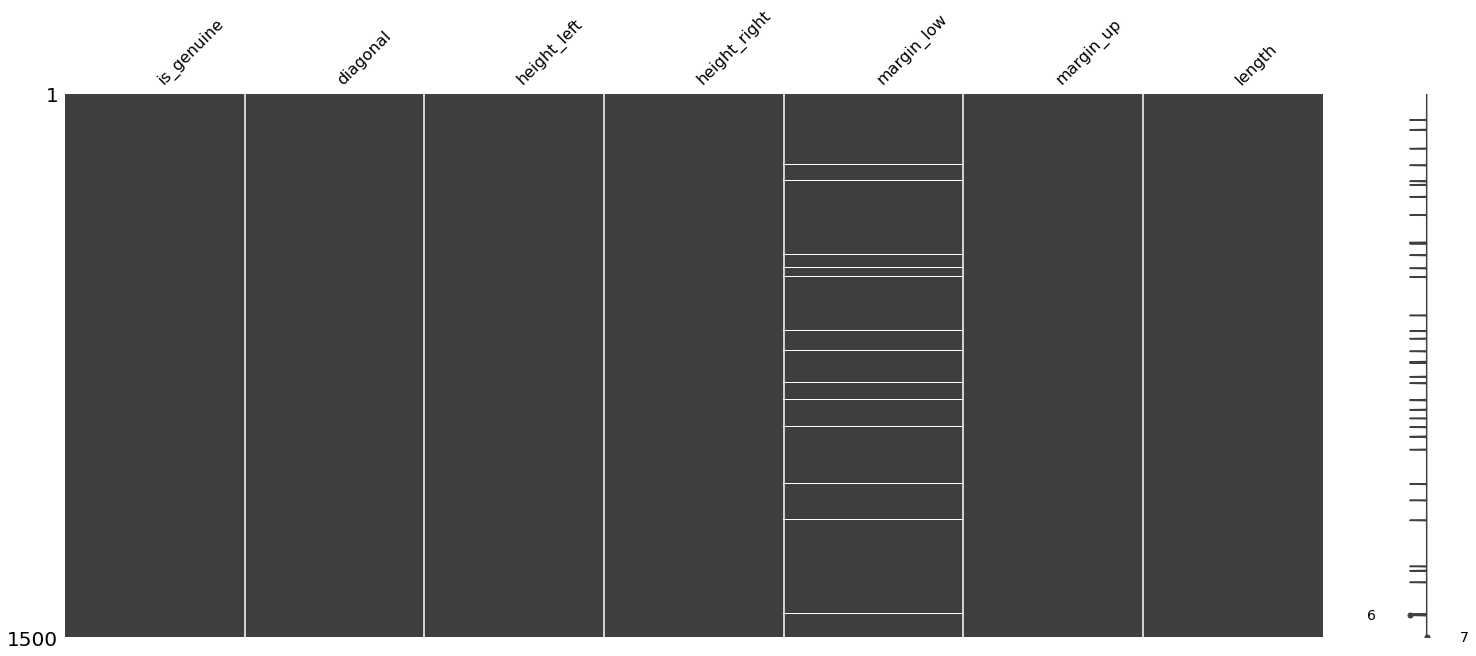

In [178]:
plt.figure(figsize=(1,1))
mno.matrix(data)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Nous pouvons observer via la matrice que des données sont manquantes dans la colonne margin_low. 

Afin de les imputer, nous allons utiliser la régression linéaire comme demandé dans l'énoncé, mais d'autres méthodes peuvent être utilisées comme un KNN imputer.

In [180]:
# rows contenant des valeurs manquantes
ma = data['margin_low'].isna()
data[ma]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


## Imputation des données avec la regression linéaire

In [181]:
# On enlève la colonne "is_genuine" car c'est une colonne qualitative

df = data.drop(columns='is_genuine')

Nous allons séparer notre dataset en train et test afin d'entrainer notre modèle et ainsi pouvoir prédire les données manquantes dans la colonne margin_low

In [182]:
# séparation des donnees manquantes du reste des données:
imput_train = data.dropna()
imput_test = data[data.isnull().any(axis=1)]

# création des datasets x_train et y_train pour entrainer le modèle:
x_train = imput_train.drop("margin_low", axis=1)
y_train = imput_train["margin_low"]

# implantation du modèle utilisé pour l'imputation, la regression linéaire:
reg_lin = linear_model.LinearRegression()
model_reg_lin = reg_lin.fit(x_train, y_train)

# Predictions avec le dataset train:
x_train = imput_train[["is_genuine","diagonal","height_left","height_right", "margin_up", "length"]]
imput_train["margin_low_pred"] = reg_lin.predict(x_train)

/var/folders/2z/22mpdqgj5fdd961v6vtrpb7h0000gn/T/ipykernel_11219/758567838.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_train["margin_low_pred"] = reg_lin.predict(x_train)


Avant de pouvoir utiliser notre modèle pour le dataset de test, nous devons tout d'abord le valider à l'aide d'une série de tests.

In [183]:
import statsmodels.formula.api as smf

# Instanciation:
reg_linb = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data = df)

# Calculs:
res_lin = reg_linb.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          2.60e-202
Time:                        17:51:03   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Les résultats à retenir ici sont : le Rsquared ou Adj. Rsquared, Omnibus et prob(Omnibus), et enfin Jarque-Bera. 

Le Rsquared définit comment le modèle de régression expliquent les données observées. Ici notre Rsquared ajusté (car nous avons un grand nombre de valeur) est de 0.476, soit 48%. 48% de la variabilité est expliquée par le modèle.

Le test Omnibus quant à lui nous montre si les résidus sont ou non normalisés. Pour qu'il soit validé, on espère un résultat proche de 0. 
Le prob(Omnibus), lui, réalise un test statistique indiquant la probabilité que les résidus soient normalement distribués. On espère un résultat proche de 1 pour qu'il soit validé.

Nous voyons ici que ni Omnibus ni prob(Omnibus) se rapprochent de leur valeur de validation, les hypothèses d'une normalisation et d'une distribution normale des résidus ne sont pas validés.

Le test de Jarque-Bera va nous montrer, comme prob(Omnibus), si les résidus sont normalement distribués. Si sa valeur est élevée, alors les résidus sont normalement distribués. Nous voyons qu'ici il est assez élevé, ce qui traduit une distribution normale des résidus. Nous allons faire un test complémentaire afin de trancher, celui de Anderson_Darling

Nous partons du principe que nous avons deux hypothèses : l'hypothèse nulle (h0) d'une normalité de distribution ainsi qu'une hypothèse alternative (h1) d'une non normalité de distribution et que notre alpha_value est égal à 0.05 .

In [184]:
from statsmodels.stats.diagnostic import het_white , normal_ad

# ajout d'une colonne avec les résidus:
imput_train["residual"] = imput_train["margin_low"] - imput_train["margin_low_pred"]

# test d'Anderson-Darling:
print("P-value du test d'Anderson_Darling:", normal_ad(imput_train["residual"])[1])

P-value du test d'Anderson_Darling: 3.9857722331535204e-05


/var/folders/2z/22mpdqgj5fdd961v6vtrpb7h0000gn/T/ipykernel_11219/1268333942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_train["residual"] = imput_train["margin_low"] - imput_train["margin_low_pred"]


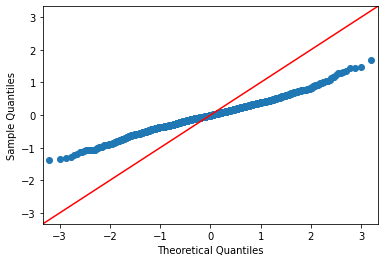

In [185]:
import pylab as py
import statsmodels.api as sm

sm.qqplot(imput_train["residual"], line ='45')
py.show()

La p-value de ce test est inférieur à notre alpha value. De ce fait, nous rejetons l'hypothèse nulle d'une normalité de distribution. Nous pouvons le confirmer également sur le QQ plot (quantile-quantile plot) que les points ne sont pas sur la ligne rouge, signe que les résidus ne suivent pas une distribution normale.

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Multicollinearite:
vif= pd.Series([variance_inflation_factor(imput_train[["diagonal","height_left","height_right", "margin_up", "length"]].values, i)
               for i in range(imput_train[["diagonal","height_left","height_right", "margin_up", "length"]].shape[1])],
              index=imput_train[["diagonal","height_left","height_right", "margin_up", "length"]].columns)
print("VIF par features:\n", vif)
print("VIF moyen:",vif.mean())

# On est oblige d'enlever ''is_genuine'' puisque c'est une variables qualitative.

VIF par features:
 diagonal        170566.670778
height_left     111895.309916
height_right    100858.864433
margin_up          261.969190
length           22708.222743
dtype: float64
VIF moyen: 81258.20741161003


Le VIF (Variance Inflation Factor ou Facteur d'Inflation de la Variation (FIV)) évalue si les facteurs sont corrélés les uns aux autres (on parle alors de multicolinéarité). On remarque ici une très grande colinéarité au vu des grandes valeurs du VIF.

Le test de White va nous montrer s'il y a ou non une homoscédasticité (une égalité dans la variance entre les résidus). S'il y en a pas, il y a donc une hétérodasticité. Nous partons du principe que nous avons une hypothèse nulle où il y aurait une homoscédasticité et une hypothèse alternative où il y aurait une hétéroscédasticité.

In [187]:
white_test = het_white(res_lin.resid, res_lin.model.exog)
labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

{'Test Statistic': 109.86015196905154, 'p-value': 2.0828244986387825e-14, 'F-Statistic': 5.853731207823728, 'F-Test p-value': 4.974865091826376e-15}


Nous voyons que la p-value est inférieur à l'alpha value de 0.05, de ce fait nous rejettons l'hypothèse nulle.

Nous voyons ici que le modèle regression linéaire n'est pas adapté à l'impuatation des données. Mais comme il est demandé d'utiliser cette méthode nous allons le faire.

In [188]:
# préparation des datasets pour test du modèle
x_test = imput_test[["is_genuine","diagonal","height_left","height_right", "margin_up","length"]]
imput_test["margin_low"] = reg_lin.predict(x_test)
reg_lin_result = [imput_test, imput_train]
imputed_df = pd.concat(reg_lin_result)
imputed_df = imputed_df.drop(["margin_low_pred", "residual"], axis=1)

/var/folders/2z/22mpdqgj5fdd961v6vtrpb7h0000gn/T/ipykernel_11219/2403433188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_test["margin_low"] = reg_lin.predict(x_test)


In [189]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [190]:
imputed_df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.482844,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659899,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Pas beaucoup de changement entre le dataframe imputé et non imputé, seuls le count, la moyenne, le premier quartile (25%) ont changé suite à l'imputation de la colonne margin_low.

<AxesSubplot:>

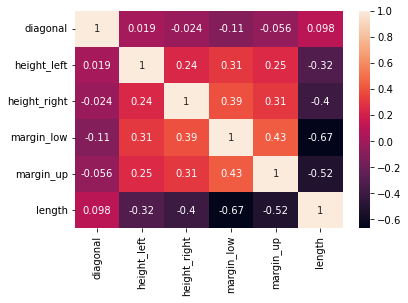

In [191]:
sns.heatmap(imputed_df.drop(columns='is_genuine').corr(), annot=True)

## Implantation du modèle prédictif utilisant les Kmeans

Méthodes pour choisir la valeur optimale pour K.

In [192]:
# feature columns
df_features = pd.DataFrame(imputed_df[["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low"]])
df_features.head(5)

,diagonal,height_left,height_right,margin_up,length,margin_low
72,171.94,103.89,103.45,3.25,112.79,4.064954
99,171.93,104.07,104.18,3.14,113.08,4.111990
151,172.07,103.80,104.38,3.02,112.93,4.134003
197,171.45,103.66,103.80,3.62,113.27,3.993571
241,171.83,104.14,104.06,3.02,112.36,4.140399


In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)
data_scaled = scaler.transform(df_features)
data_scaled= pd.DataFrame(data=data_scaled, index=df_features.index, columns=df_features.columns)
print(data_scaled.describe().round(2))

       diagonal  height_left  height_right  margin_up   length  margin_low
count   1500.00      1500.00       1500.00    1500.00  1500.00     1500.00
mean       0.00         0.00         -0.00      -0.00     0.00       -0.00
std        1.00         1.00          1.00       1.00     1.00        1.00
min       -3.01        -2.97         -3.38      -3.80    -3.65       -2.28
25%       -0.68        -0.70         -0.65      -0.70    -0.74       -0.69
50%        0.01         0.03         -0.00      -0.05     0.32       -0.26
75%        0.69         0.67          0.71       0.68     0.76        0.59
max        3.45         2.84          3.16       3.27     2.02        3.66


In [194]:
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(data_scaled)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

print(pca.explained_variance_ratio_.cumsum())

# on utilisera ici 3 PC car ils couvrent 73% de la variance expliquée

[0.43211292 0.60168469 0.73187739 0.85011786 0.94674888 1.        ]


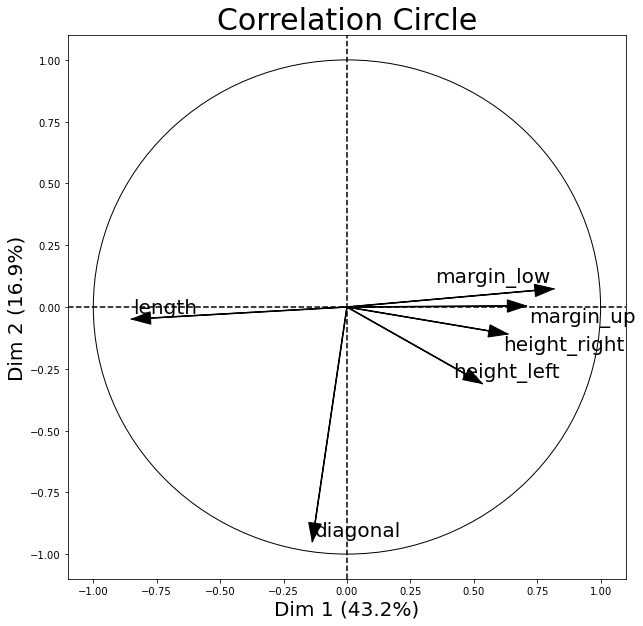

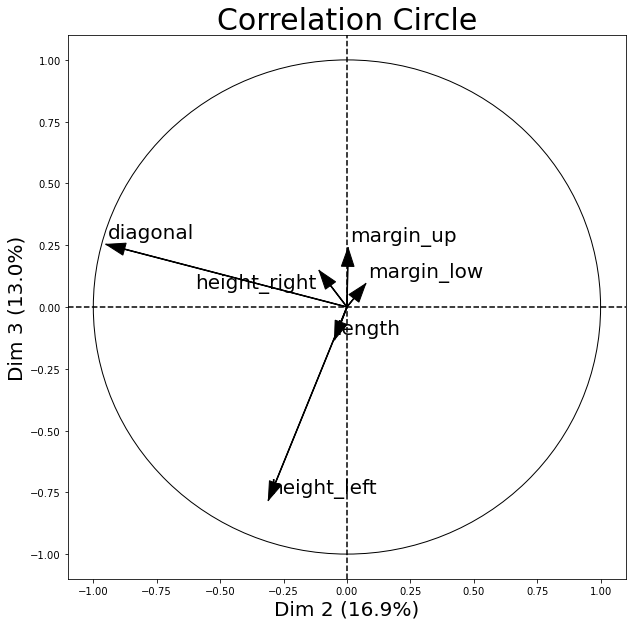

In [195]:
pca = PCA(n_components=3)

pc = pca.fit_transform(df_features)

df_pc = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3'])

# cercles de corrélation pour les 3 composantes principales
from mlxtend.plotting import plot_pca_correlation_graph



feature_names = [
  'diagonal', 
  'height_left', 
  'height_right', 
  'margin_up',
  'length', 
  'margin_low']

figure = plot_pca_correlation_graph(data_scaled,feature_names,dimensions=(1,2),figure_axis_size=10)
figure = plot_pca_correlation_graph(data_scaled,feature_names,dimensions=(2,3),figure_axis_size=10)

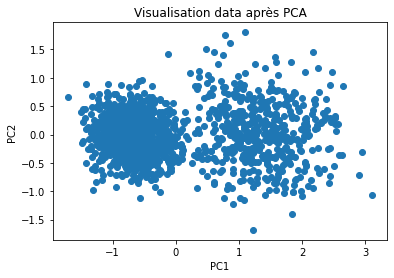

In [196]:
plt.scatter(df_pc.PC1, df_pc.PC2)
plt.title('Visualisation data après PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Méthode du coude

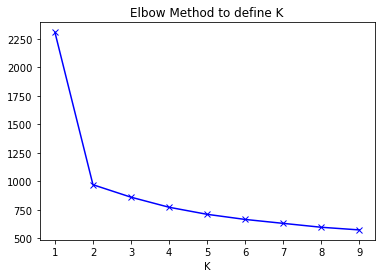

In [197]:
X = df_features

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

plt.plot(K, inertias, 'bx-')
plt.xlabel('K')
plt.title('Elbow Method to define K')
plt.show()

Ici, la valeur optimale pour K est 2 car la courbe devient plus lisse à partir de 2.

Méthode de la silhouette

In [198]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster


for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5150031529505773
Silhouette score for k(clusters) = 3 is 0.3863010249194272
Silhouette score for k(clusters) = 4 is 0.17170906646425446
Silhouette score for k(clusters) = 5 is 0.16944571764731553
Silhouette score for k(clusters) = 6 is 0.1537450882578071
Silhouette score for k(clusters) = 7 is 0.14893607573715956
Silhouette score for k(clusters) = 8 is 0.15339597809151898
Silhouette score for k(clusters) = 9 is 0.15041848464981647


La valeur associée à K = 2 est la plus imposante comparé aux autres. De ce faire nous choisirons K = 2. Il y aura donc deux clusters (les vrais et faux billets).

On voit ici que le cluster 0 regroupe les vrais billets et le cluster 1 regroupe les faux billets

Mise en place du modèle

/Users/stephaniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


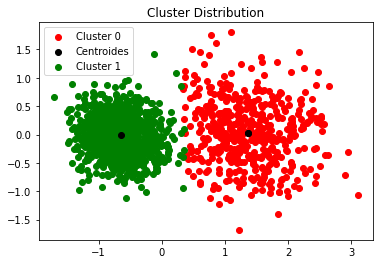

In [199]:
from sklearn import decomposition


km = KMeans(n_clusters=2) # nos deux clusters : True et False
model_kmean = km.fit(imputed_df.drop(columns='is_genuine')) # modèle

clusters_km = km.labels_ # clustermap
centroids_km = km.cluster_centers_ #centroids pour la distribution des clusters

# PCA
pca_km = decomposition.PCA(n_components=3).fit(imputed_df[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
pca = PCA(n_components=3).fit_transform(imputed_df[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

# Affichage des centroids sur la cluster distribution
centroids_km = pca_km.transform(centroids_km)

# Graphique:
for couleur,k in zip(['red',"green"],[0,1]):
    plt.scatter(pca[km.labels_==k,0],pca[km.labels_==k,1],c=couleur, label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_km[:,0],centroids_km[:,1],color="black",label="Centroides")
plt.title("Cluster Distribution")
plt.show()

#Verrfication de la classification: Matrice de confusion:
conf = pd.crosstab(clusters_km,imputed_df["is_genuine"])

Text(0.5, 1.0, 'Confusion matrix pour le modèle Kmean')

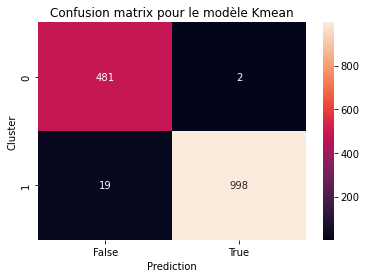

In [200]:
sns.heatmap(conf, annot=True, fmt='g')
plt.xlabel("Prediction")
plt.ylabel("Cluster")
plt.title("Confusion matrix pour le modèle Kmean")

In [201]:
# test du modèle sur le fichier prod
prod = prod_raw.drop(columns='id')
km_predict = km.predict(prod)

# ajout de la colonne kmean_predict pour comparatif des resultats avec le modèle regression_logistique
prod['kmean_predict'] = km_predict

print(km_predict)
print('On voit que les trois premiers billets appartiennent au cluster 0 et les deux derniers au cluster 1. Les trois premiers billets sont faux tandis que les deux derniers sont vrais')

[0 0 0 1 1]
On voit que les trois premiers billets appartiennent au cluster 0 et les deux derniers au cluster 1. Les trois premiers billets sont faux tandis que les deux derniers sont vrais


In [202]:
# ajout de la colonne kmean_pred pour comparatif des prédictions avec l'autre modèle
prod_raw['kmean_pred'] = km_predict

# Mise en place de la regression logistique

In [203]:
# target : savoir si les billets sont True ou False
y = imputed_df['is_genuine']

# les features : les dimensions des billets
x = imputed_df.drop(columns='is_genuine')


In [204]:
model_reg = LogisticRegression()
model_reg.fit(x,y)
train_reg_pred = model_reg.predict(x)

Text(0.5, 1.0, 'Confusion matrix pour le modèle Regression Logistique')

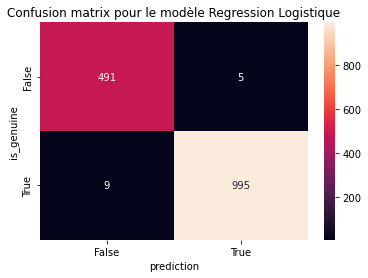

In [205]:
conf_reg = pd.crosstab(train_reg_pred,y)
sns.heatmap(conf_reg, annot=True, fmt='g')
plt.xlabel("prediction")
plt.ylabel('is_genuine')
plt.title('Confusion matrix pour le modèle Regression Logistique')

In [212]:
# Vue des probas selon les predictions pour le dataset de train
imputed_df["y_pred"] = model_reg.predict(x)
imputed_df["proba"] = model_reg.predict_proba(x)

imputed_df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,y_pred,proba
72,True,171.94,103.89,103.45,4.064954,3.25,112.79,True,0.011064
99,True,171.93,104.07,104.18,4.111990,3.14,113.08,True,0.017965
151,True,172.07,103.80,104.38,4.134003,3.02,112.93,True,0.024175
197,True,171.45,103.66,103.80,3.993571,3.62,113.27,True,0.006266
241,True,171.83,104.14,104.06,4.140399,3.02,112.36,True,0.159595


Courbe de ROC

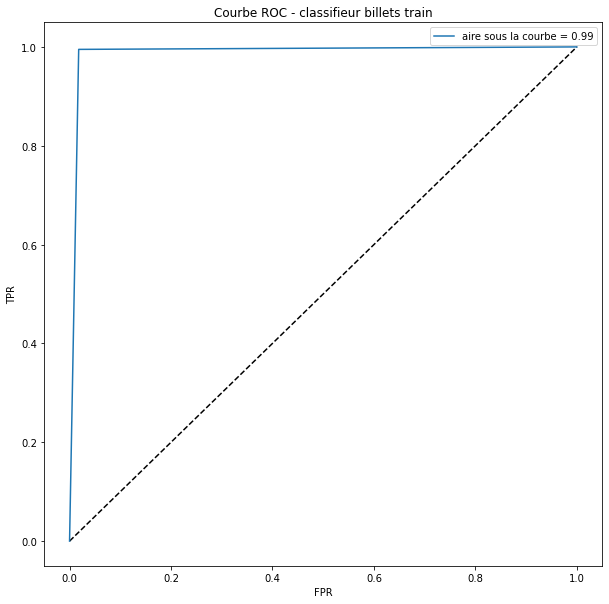

In [207]:
# calculs des fpr, tpr et auc pour courbe ROC
fpr, tpr, _ = roc_curve(imputed_df["is_genuine"],imputed_df["y_pred"])
roc_auc = roc_auc_score(imputed_df["is_genuine"],imputed_df["y_pred"])

# Plot de la courbe ROC
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr, tpr)
plt.plot(fpr, tpr,label="aire sous la courbe = %0.2f" % roc_auc)
ax.set_title('Courbe ROC - classifieur billets train')
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()

la courbe ROC (Receiver Operating Characteristic) représente la sensibilité (x) et spécificité (y) en fonction de 1 (sensibilité  = capacité du test à bien déterminer si les billets sont vrais et sensibilité = idem mais pour déterminer si les billets sont faux). L'AUC (area under curve) permet de vérifier si modèle stable

Test du modèle sur le dataset de test

In [208]:
prod_reg = prod_raw.drop(columns=['id','kmean_pred'])
pred_reg = model_reg.predict(prod_reg)

In [216]:
# Vue des résultats de prédiction avec la probabilité
prod_raw["y_pred"] = model_reg.predict(prod_reg)
prod_raw["proba"] = model_reg.predict_proba(prod_reg)
print(prod_raw[['id','y_pred','proba']])

    id  y_pred     proba
0  A_1   False  0.996328
1  A_2   False  0.999426
2  A_3   False  0.999102
3  A_4    True  0.078777
4  A_5    True  0.000271


Nous obtenons les mêmes prédictions qu'avec le modèle Kmean

In [217]:
prod_raw

,diagonal,height_left,height_right,margin_low,margin_up,length,id,kmean_pred,y_pred,proba
0,0.003672,171.76,104.01,103.54,5.21,3.30,A_1,0,False,0.996328
1,0.000574,171.87,104.17,104.13,6.00,3.31,A_2,0,False,0.999426
2,0.000898,172.00,104.58,104.29,4.99,3.39,A_3,0,False,0.999102
3,0.921223,172.49,104.55,104.34,4.44,3.03,A_4,1,True,0.078777
4,0.999729,171.65,103.63,103.56,3.77,3.16,A_5,1,True,0.000271


Sérialisation des models pour le notebook application

In [211]:
# sérialisation des models pour exportation vers un nouveau notebook
import pickle
pickle.dump(model_kmean, open('model_kmean','wb'))
pickle.dump(model_reg, open('model_reg','wb'))